# Spin-waves in the Heisenberg Model

The Heisenberg Model is defined by Hamiltonian
$$H=-J\sum_{i=1}^N \sum_{a \in x,y,z} \sigma_a^{(i)}\sigma_a^{(i+1)}$$
where $N$ is the number of sites and $J_a$ is the coupling strength.


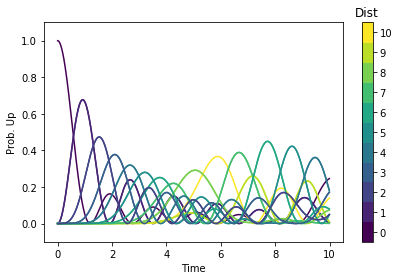

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

N = 20  # number of qubits
k = 1 # initial state
J = 1.0 # interaction strength

kns = 2.*np.pi*np.arange(N)/float(N)
arg1 = 2.*J*np.cos(kns)


def f(j, t):
    arg = arg1*t + kns*(j-k)
    a = np.exp(1j*arg)
    return np.sum(a)/N



N_it = 1000
delta = 0.01

data = np.zeros(shape=(N_it, N))
xs = np.array([i*delta for i in range(N_it)])

for i, ti in enumerate(xs):
    for j in range(N):
        x = f(j, ti)
        x = np.conj(x)*x
        data[i, j] = np.real(x)

Ds = [np.min([np.abs(k-i), np.abs(N+1-i)]) for i in range(N)]
D_u = list(np.unique(Ds))

"""
Evolution
"""

fig = plt.figure()
cmap = mpl.cm.get_cmap('viridis')

for i in range(N):
    mult = np.sum(Ds == Ds[i])
    c = D_u.index(Ds[i])
    plt.plot(xs, data[:, i]*mult, c=cmap(c/D_u[-1]))
    #plt.axvline(x=M[i], c=cmap(c/D_u[-1]), linestyle='dashed')

bounds = D_u + [D_u[-1]+1]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm),
                    spacing='uniform',
                    orientation='vertical')

tick_loc = [i+0.5 for i in bounds]
cbar.set_ticks(tick_loc)
cbar.set_ticklabels(D_u)
cbar.ax.set_title('Dist')

plt.ylabel('Prob. Up')
plt.ylim(-0.1, 1.1)
plt.xlabel('Time')

fig.tight_layout()


plt.show()
